In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [5]:
# Import Tenosrflow
import tensorflow as tf
from tensorflow import keras
import zipfile

In [53]:
train_mask_dir = os.path.join('/kaggle/input/face-mask-dataset/data/with_mask')
train_without_mask_dir = os.path.join('/kaggle/input/face-mask-dataset/data/without_mask')

In [14]:
train_mask = os.listdir(train_mask_dir)
print(f'  Mask Data \n\n{train_mask[:10]}')
train_without = os.listdir(train_without_mask_dir)
print(f'\n\nWithout MaskData\n{train_without[:10]}')

  Mask Data 

['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg', 'with_mask_1811.jpg', 'with_mask_532.jpg', 'with_mask_1619.jpg', 'with_mask_3471.jpg', 'with_mask_3501.jpg']


Without MaskData
['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg', 'without_mask_2060.jpg', 'without_mask_559.jpg', 'without_mask_3273.jpg', 'without_mask_124.jpg', 'without_mask_1849.jpg', 'without_mask_139.jpg', 'without_mask_2137.jpg']


In [16]:
print('Mask Length: ',len(os.listdir(train_mask_dir)))
print('With Out Mask Length: ',len(os.listdir(train_without_mask_dir)))

Mask Length:  3725
With Out Mask Length:  3828


In [17]:
import matplotlib.image as mping
%matplotlib inline
nrows = 4
ncols = 4
pic_index = 0

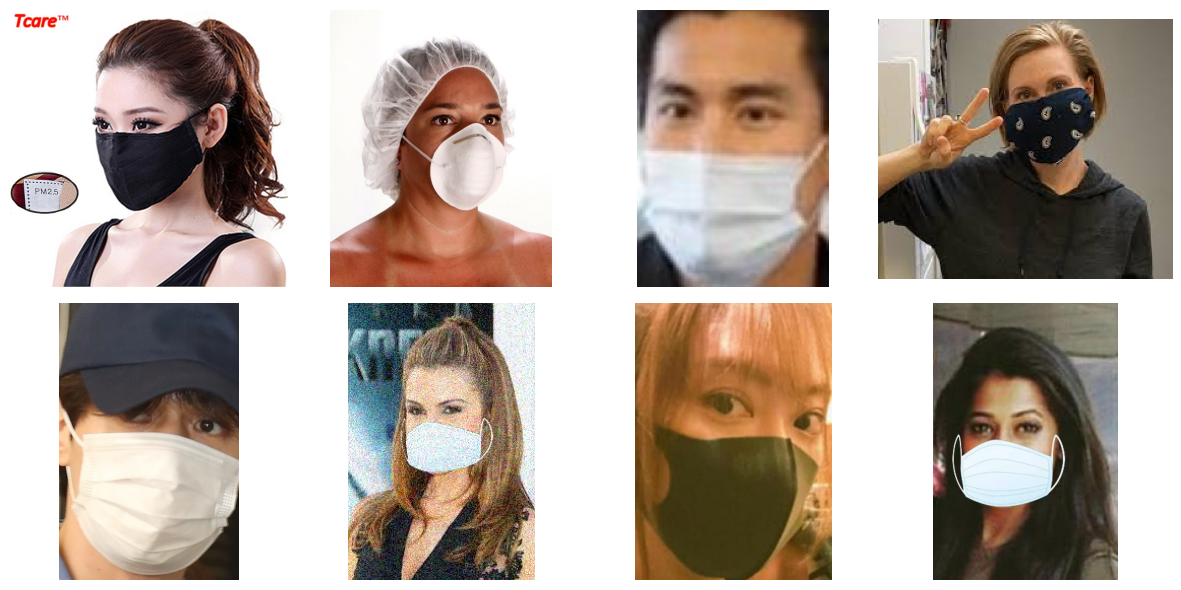

In [48]:
import os
import matplotlib.pyplot as plt

folder_path = "/kaggle/input/face-mask-dataset/data/with_mask"
files = os.listdir(folder_path)

num_printed = 0

fig, axs = plt.subplots(2, 4, figsize=(12, 6))

print('Mask Image\n\n')

for file in files:
    
    if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
        
        image_path = os.path.join(folder_path, file)
        
        img = plt.imread(image_path)
        row_index = num_printed // 4
        col_index = num_printed % 4
        axs[row_index, col_index].imshow(img)
        axs[row_index, col_index].axis('off')
        
        num_printed += 1
        if num_printed == 8:
            break

# Hide any empty subplots
for i in range(num_printed, 8):
    row_index = i // 4
    col_index = i % 4
    axs[row_index, col_index].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


Mask Image




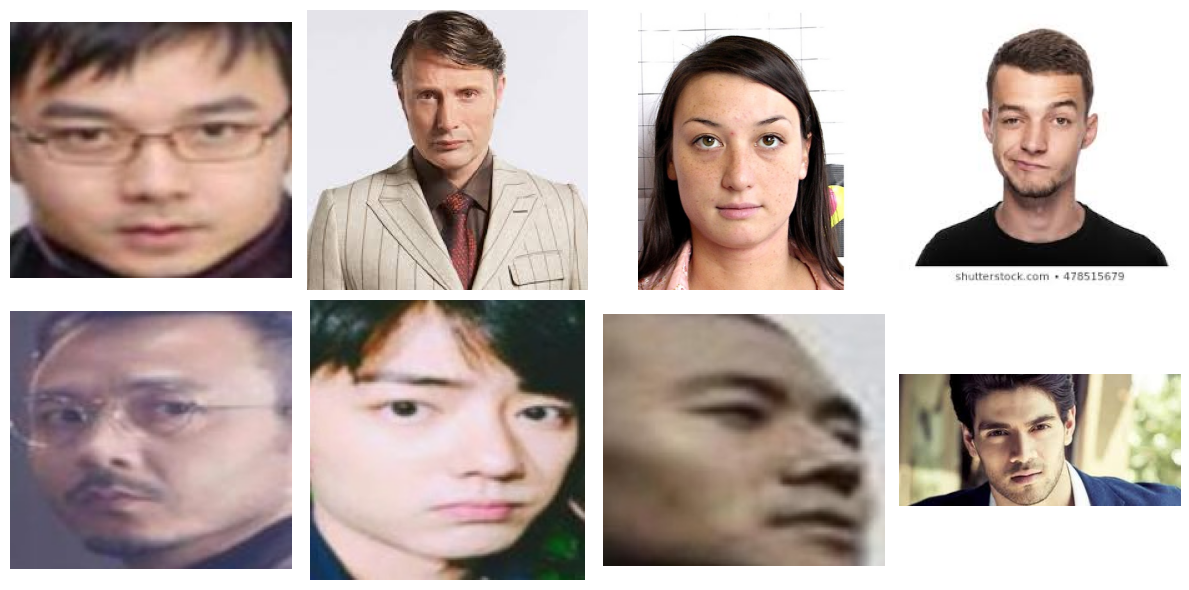

In [49]:
import os
import matplotlib.pyplot as plt

folder_path = "/kaggle/input/face-mask-dataset/data/without_mask"
files = os.listdir(folder_path)

num_printed = 0

fig, axs = plt.subplots(2, 4, figsize=(12, 6))

print('With Out Mask Image\n\n')

for file in files:
    
    if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
        
        image_path = os.path.join(folder_path, file)
        
        img = plt.imread(image_path)
        row_index = num_printed // 4
        col_index = num_printed % 4
        axs[row_index, col_index].imshow(img)
        axs[row_index, col_index].axis('off')
        
        num_printed += 1
        if num_printed == 8:
            break

# Hide any empty subplots
for i in range(num_printed, 8):
    row_index = i // 4
    col_index = i % 4
    axs[row_index, col_index].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [51]:
# // 

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape= (300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator(rescale = 1 /255)
train_gernater = train_data.flow_from_directory(
    '/kaggle/input/face-mask-dataset/data',
    target_size=(300,300),
    batch_size=128,
    class_mode = 'binary'
)

Found 7553 images belonging to 2 classes.


In [58]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch(self,epoch,logs={}):
        if (logs.get('accuracy' >= 0.98)):
            print('Reach ((98% Accuracy so Canclle traning')
            self.model.stop_traning = True
callbacks  = myCallBack()            

In [61]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_gernater,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    callbacks=[callbacks]
)

In [66]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

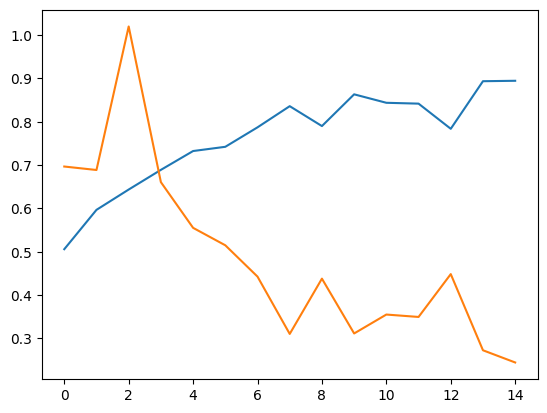

In [68]:
plt.plot(epochs,acc,label='Accuracy')
plt.plot(epochs,loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.]
with_mask_3326.jpg

Mask Image


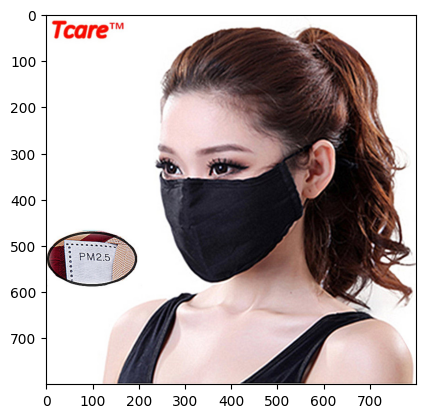

In [101]:
import numpy as np
import os
from keras.preprocessing import image

uploaded_images_folder = "/kaggle/input/face-mask-dataset/data/with_mask"
n=0
for fn in os.listdir(uploaded_images_folder):
    path = os.path.join(uploaded_images_folder, fn)
    read_image = plt.imread(path)
    plt.imshow(read_image)
    img = image.load_img(path, target_size=(300,300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0] > 0.5:
        print(fn + 'Not mask')
    else:
        print(fn + '\n\nMask Image' )
    n= n+1
    if n==1:
        break


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[1.]
without_mask_3248.jpg

Not maskImage


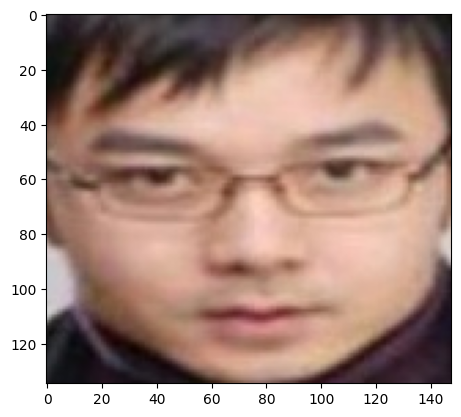

In [100]:
import numpy as np
import os
from keras.preprocessing import image

uploaded_images_folder = "/kaggle/input/face-mask-dataset/data/without_mask"
n=0
for fn in os.listdir(uploaded_images_folder):
    path = os.path.join(uploaded_images_folder, fn)
    
    read_image = plt.imread(path)
    plt.imshow(read_image)

        
    img = image.load_img(path, target_size=(300,300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0] > 0.5:
        print(fn + '\n\nNot maskImage')
    else:
        print(fn + 'Mask Image' )
    n= n+1
    if n==1:
        break
